In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import numpy as np
import matplotlib.pyplot as plt
import utils
from torch.utils.tensorboard import SummaryWriter
import ipywidgets as widgets
%matplotlib inline

In [3]:
model = utils.AutoEncoder(2)
loss_fn = nn.MSELoss()
writer = SummaryWriter()
model_path = "../models/autoencoder_latent_space_2.pth"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

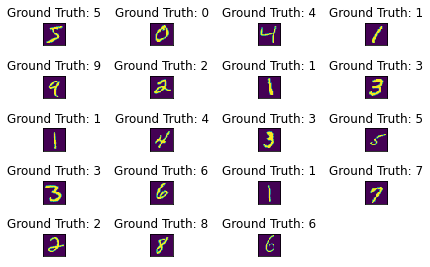

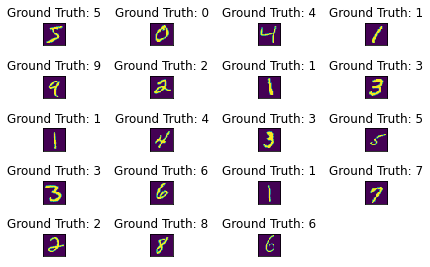

In [9]:
test_batch_size = 32
train_data, test_data = utils.load_mnist_dataset(1024, test_batch_size)
data = enumerate(train_data)
_, (example_data, target) = data.__next__()
fig = plt.figure()
row_num = 5
col_num = 4
for i in range(row_num * col_num - 1):
    plt.subplot(row_num,col_num,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='viridis', interpolation='none')
    plt.title(f"Ground Truth: {target[i]}")
    plt.xticks([])
    plt.yticks([])
fig

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
utils.train(model, train_data, optimizer, 100, device=device, writer=None)

Error for epoch 1: 0.03523278249017263
Error for epoch 2: 0.03488968912575204
Error for epoch 3: 0.03496085776615951
Error for epoch 4: 0.03502064823346623
Error for epoch 5: 0.034948032475629096
Error for epoch 6: 0.03520360980498589
Error for epoch 7: 0.03540243726160567
Error for epoch 8: 0.035127945054890745
Error for epoch 9: 0.034980453424534555
Error for epoch 10: 0.034968073400905575
Error for epoch 11: 0.03494636638689849
Error for epoch 12: 0.035024771624702515
Error for epoch 13: 0.03516937186152248
Error for epoch 14: 0.03514923925622035
Error for epoch 15: 0.034962065012778265
Error for epoch 16: 0.03503184879230241
Error for epoch 17: 0.0351498702825126
Error for epoch 18: 0.03507101460028503
Error for epoch 19: 0.03505357234912403
Error for epoch 20: 0.03501392383191545
Error for epoch 21: 0.03503036284345692
Error for epoch 22: 0.03499233867909949
Error for epoch 23: 0.03501771516719107
Error for epoch 24: 0.035185762254868524
Error for epoch 25: 0.03529972437832315
Err

KeyboardInterrupt: 

[]

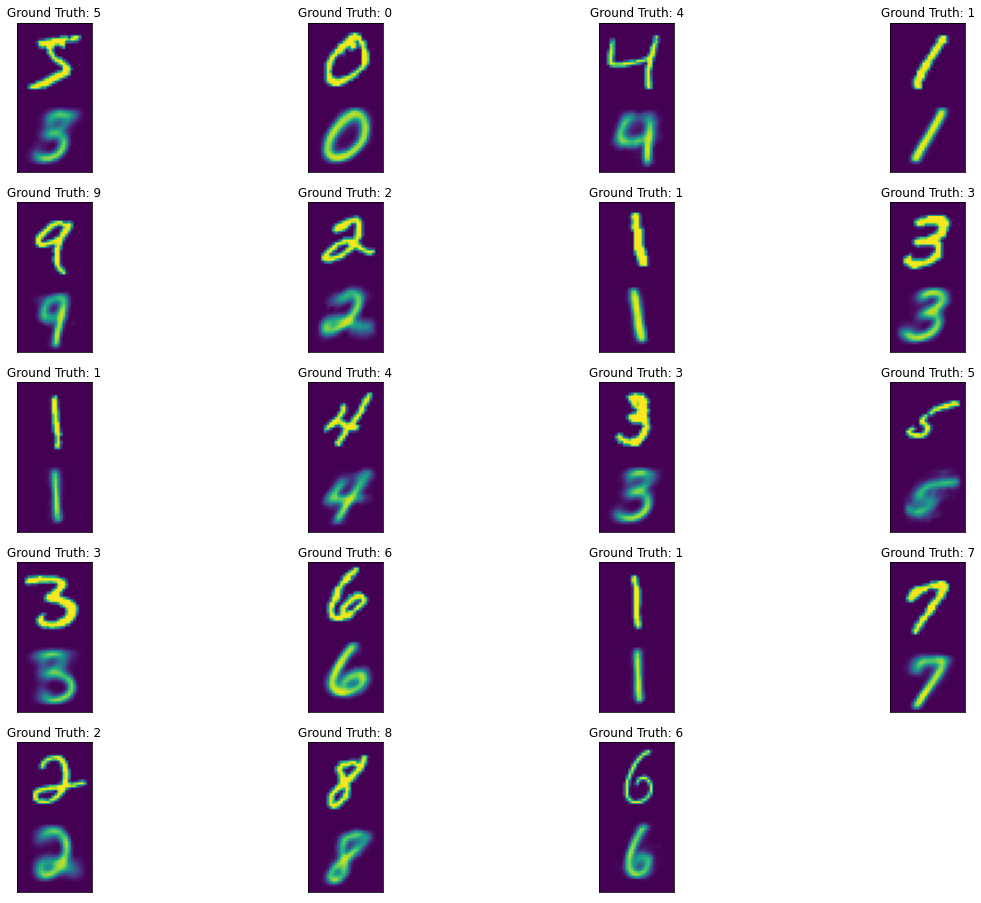

In [40]:
# plot the data
data = enumerate(train_data)
_, (batch, target) = data.__next__()
plt.figure(figsize=(20, 16))
for i in range(row_num * col_num - 1):
    plt.subplot(row_num,col_num,i+1)
    reconstructed_op = model(batch[i].unsqueeze(0).to(device)) # make the shape suitable to pass into training
    plt.imshow(torch.cat((batch[i][0].to(device), reconstructed_op[0][0])).detach().cpu().numpy())
    plt.title(f"Ground Truth: {target[i]}")
    plt.xticks([])
    plt.yticks([])
plt.plot()

In [20]:
minimum = -5
maximum = 5
@widgets.interact(x = (minimum, maximum, 0.01), y = (minimum, maximum, 0.01))
def get_image(x, y):
    plt.imshow(model.decode(torch.tensor([x, y]).unsqueeze(0).to(device))[0][0].detach().cpu().numpy())

interactive(children=(FloatSlider(value=0.0, description='x', max=5.0, min=-5.0, step=0.01), FloatSlider(value…

In [41]:
x_dim = np.array([None] * 10)
y_dim = np.array([None] * 10)
for inp, label in test_data:
    inp = inp.to(device)
    encoded_values = model.encoder(inp)
    for i in range(test_batch_size):
        if x_dim[label[i]] is None:
            x_dim[label[i]] = np.array([encoded_values[i][0].detach().cpu()])
            y_dim[label[i]] = np.array([encoded_values[i][1].detach().cpu()])
        else:
            x_dim[label[i]] = np.append(x_dim[label[i]], encoded_values[i][0].detach().cpu())
            y_dim[label[i]] = np.append(y_dim[label[i]], encoded_values[i][1].detach().cpu())


[]

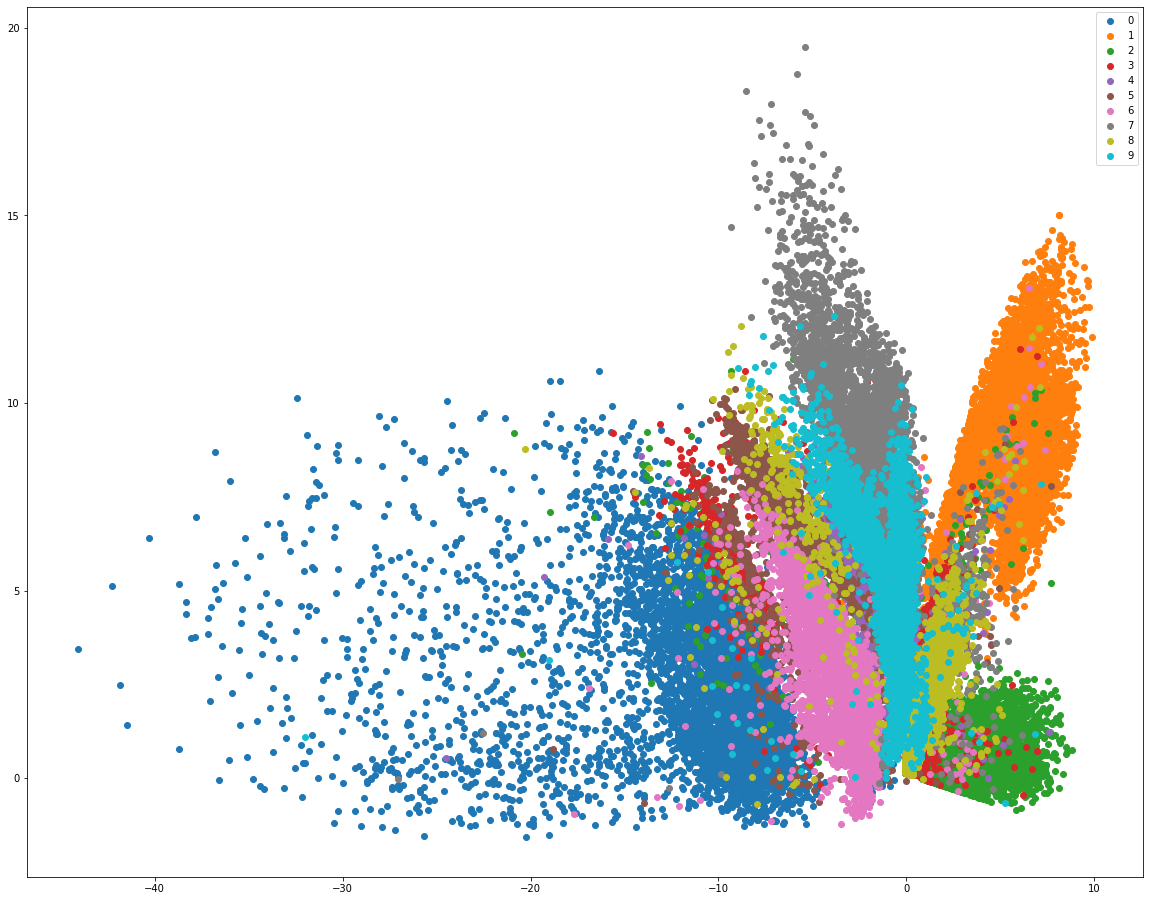

In [44]:
plt.figure(figsize=(20, 16))
for i in range(10):
    plt.scatter(x_dim[i], y_dim[i], label = f"{i}")

plt.legend()
plt.plot()

In [25]:

torch.save(model.state_dict(), model_path)